In [66]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import pearsonr

In [8]:
def getDollarExposure(spotEntry, noShares, marginFactor):
  return spotEntry * noShares * marginFactor

def getSharesForTargetExposure(targetExposure, underlyingPrice, marginFactor):
  return int(targetExposure / underlyingPrice)

In [5]:
targetExposure = 1000000.00;
underlyingPrice = 55.450001;
marginFactor = 0.05;
totalSupply = 1000000;

In [80]:
def get_token_nav(close):
    dollarExposure = getDollarExposure(float(close), targetShares, marginFactor)
    CFDnotionalTokenValue = dollarExposure / totalSupply
    return CFDnotionalTokenValue * 1000 #for plotting only

In [84]:
df = pd.read_csv("./data/USO.csv").reset_index()
df['Token_Nav'] = df.apply (lambda row: get_token_nav(row['Open']), axis=1)

In [82]:
df.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume,NTV
0,0,2021-11-23,55.450001,56.270000,55.439999,56.200001,56.200001,5877400,23.438715
1,1,2021-11-24,55.810001,56.380001,55.779999,55.880001,55.880001,4109000,23.590887
2,2,2021-11-26,52.330002,52.380001,48.560001,49.630001,49.630001,18765600,22.119892
3,3,2021-11-29,51.970001,52.169998,49.639999,50.169998,50.169998,13571400,21.967719
4,4,2021-11-30,48.619999,49.110001,46.470001,47.910000,47.910000,21152500,20.551674


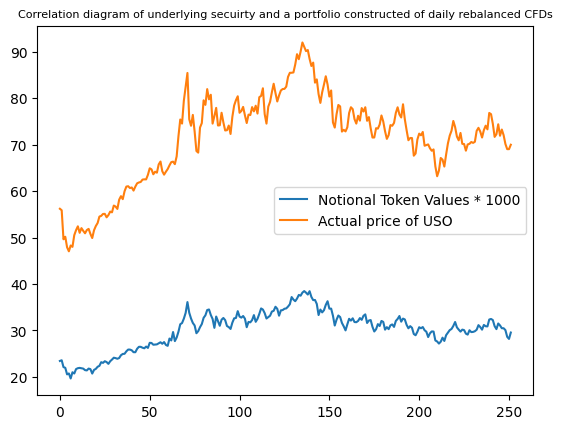

In [94]:
plt.plot(df['Token_Nav'], label = "Notional Token Values * 1000", linestyle="-")
plt.plot(df['Close'], label = "Actual price of USO", linestyle="-")
plt.title('Correlation diagram of underlying secuirty and a portfolio constructed of daily rebalanced CFDs', fontsize=8)
plt.legend()
plt.show()

In [93]:
df['Close'].corr(df['Token_Nav'], method = 'pearson')

0.9903152800829986